In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

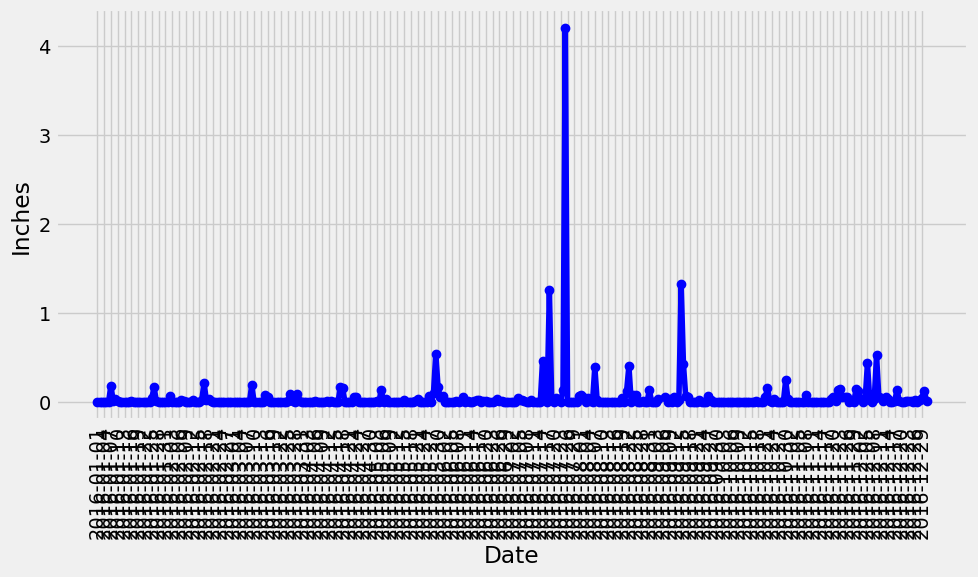

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date1 = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
date2 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date2= dt.date(2016, 8, 23)
# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).\
     group_by(Measurement.date).filter(Measurement.date >='2016, 8, 23',
           Measurement.date <= '2017, 8, 23').all()
    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(scores, columns=['Date', 'precipitation'])

# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
#df = df.sort_values(by='Date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['precipitation'], marker='o', color='blue', linestyle='-')

#Set tick locations every three months
plt.xticks(df['Date'][::3], df['Date'].dt.strftime('%Y-%m-%d')[::3], rotation=90)

# Use Pandas Plotting with Matplotlib to plot the data
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df.describe()
summary_statistics

,Date,precipitation
count,366,364.000000
mean,2016-07-01 12:00:00,0.044368
min,2016-01-01 00:00:00,0.000000
25%,2016-04-01 06:00:00,0.000000
50%,2016-07-01 12:00:00,0.000000
75%,2016-09-30 18:00:00,0.020000
max,2016-12-31 00:00:00,4.200000
std,NaN,0.247813


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
Station = session.query(Measurement.station)
total_station_number = Station.distinct().count()
total_station_number

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
engine.execute('SELECT station, COUNT(station) FROM Measurement GROUP BY station ORDER BY COUNT(station) DESC').all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()
    

[(54.0, 85.0, 71.66378066378067)]

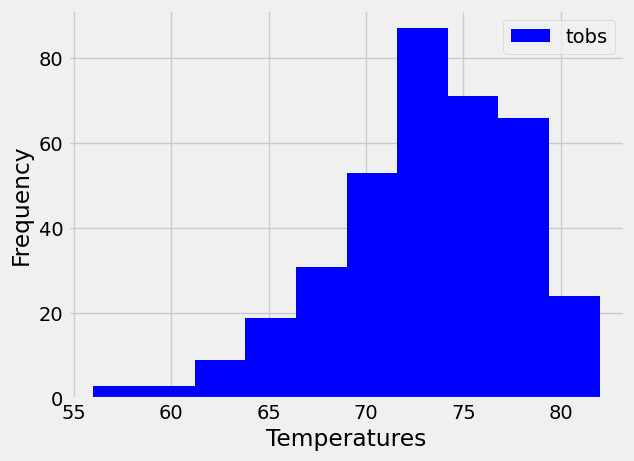

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >='2016, 8, 23',
               Measurement.date <= '2017, 8, 23').all()
column_values = [row[0] for row in temperature]
plt.hist(column_values, bins=10, color='blue', label='tobs')
plt.legend()
plt.xlabel('Temperatures')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()